In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
flow=load_iris()

In [4]:
dir(flow)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
df=pd.DataFrame(flow.data,columns=flow.feature_names)

In [7]:
df.head()


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [14]:
df=df.drop(['petal length (cm)','petal width (cm)'],axis="columns")

In [16]:
df.head()

sepal length (cm)  sepal width (cm)
0                5.1               3.5
1                4.9               3.0
2                4.7               3.2
3                4.6               3.1
4                5.0               3.6

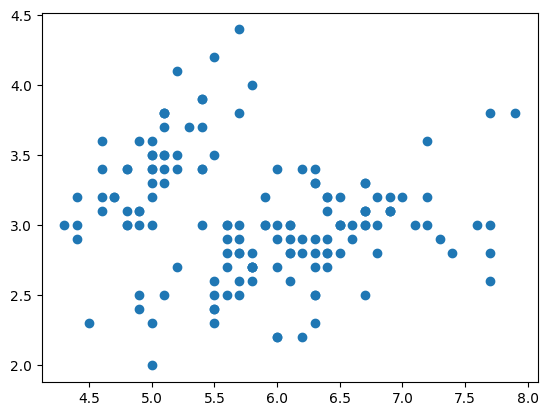

In [17]:
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'])
plt.show()

In [54]:
km=KMeans(n_clusters=3)
y=km.fit_predict(df[['sepal length (cm)','sepal width (cm)']])
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [55]:
df['cluster']=y

In [56]:
df.head()

sepal length (cm)  sepal width (cm)  cluster
0                5.1               3.5        1
1                4.9               3.0        1
2                4.7               3.2        1
3                4.6               3.1        1
4                5.0               3.6        1

In [57]:
km.cluster_centers_

array([[6.82391304, 3.07826087],
       [5.00392157, 3.40980392],
       [5.8       , 2.7       ]])

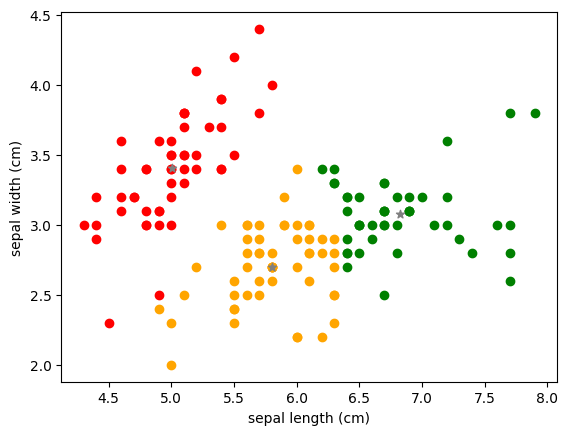

In [58]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='green')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='red')
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],color='orange')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='gray',marker='*',label='centroid')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()



In [52]:
sse=[]
k_ran=range(1,9)
for k in k_ran:
    km=KMeans(n_clusters=k)
    km.fit(df[['sepal length (cm)','sepal width (cm)']])
    sse.append(km.inertia_)

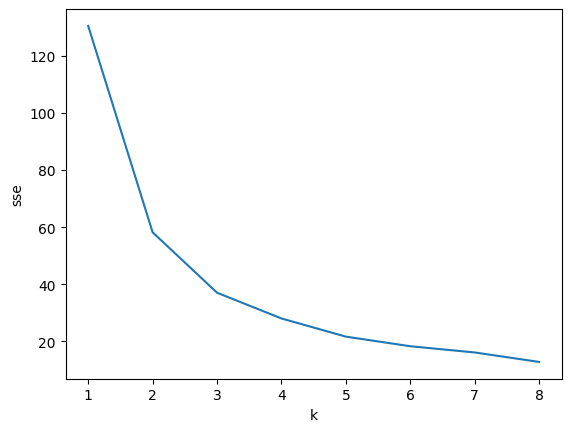

In [53]:
plt.xlabel('k')
plt.ylabel('sse')
plt.plot(k_ran,sse)